In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Live.csv")
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_reactions,7050.0,230.117163,462.625309,0.0,17.0,59.5,219.00,4710.0
num_comments,7050.0,224.356028,889.636820,0.0,0.0,4.0,23.00,20990.0
num_shares,7050.0,40.022553,131.599965,0.0,0.0,0.0,4.00,3424.0
num_likes,7050.0,215.043121,449.472357,0.0,17.0,58.0,184.75,4710.0
num_loves,7050.0,12.728652,39.972930,0.0,0.0,0.0,3.00,657.0
num_wows,7050.0,1.289362,8.719650,0.0,0.0,0.0,0.00,278.0
num_hahas,7050.0,0.696454,3.957183,0.0,0.0,0.0,0.00,157.0
num_sads,7050.0,0.243688,1.597156,0.0,0.0,0.0,0.00,51.0
num_angrys,7050.0,0.113191,0.726812,0.0,0.0,0.0,0.00,31.0
Column1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.drop(df.columns[12:16],axis=1)
df.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')

In [ ]:
df.isna().sum()

status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64

In [ ]:
df.dtypes

status_id           object
status_type         object
status_published    object
num_reactions        int64
num_comments         int64
num_shares           int64
num_likes            int64
num_loves            int64
num_wows             int64
num_hahas            int64
num_sads             int64
num_angrys           int64
dtype: object

In [ ]:
df.status_id.unique()

array(['246675545449582_1649696485147474',
       '246675545449582_1649426988507757',
       '246675545449582_1648730588577397', ...,
       '1050855161656896_1060126464063099',
       '1050855161656896_1058663487542730',
       '1050855161656896_1050858841656528'], dtype=object)

In [ ]:
df.status_type.unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [ ]:
df.status_published.unique()

array(['4/22/2018 6:00', '4/21/2018 22:45', '4/21/2018 6:17', ...,
       '9/21/2016 23:03', '9/20/2016 0:43', '9/10/2016 10:30'],
      dtype=object)

### We can see that status_id and status_plubished is like serial number for a customer so we can remove them

In [ ]:
df.drop(["status_published","status_id"],axis=1,inplace=True)
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [ ]:
df_oh = df.copy()
le=LabelEncoder()
df_oh["status_type"] = le.fit_transform(df.status_type)

In [ ]:
#scaling

sd = MinMaxScaler()
df_std = pd.DataFrame(sd.fit_transform(df_oh))
df_std.columns = df_oh.columns
df_std.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


### As we have more than 2 features so we can use PCA to reduce the dimensionality of the data

In [ ]:
#pca
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_std)
df_pca = pd.DataFrame(pca.transform(df_std))
df_pca.shape

(7050, 2)

In [ ]:
df_pca.head()

,0,1
0,0.446218,0.068944
1,-0.237240,-0.010435
2,0.429787,-0.028372
3,-0.237808,-0.021956
4,-0.235285,0.008596


### Finding best number of cluster for clustering using elbow method

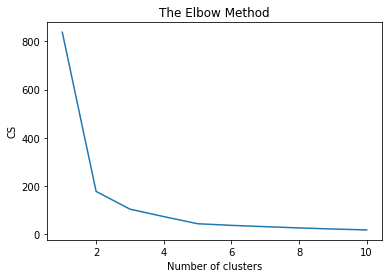

In [ ]:
cs=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_pca)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [ ]:
#k = 4
kmeans = KMeans(n_clusters=4)
y = kmeans.fit_predict(df_pca)

In [ ]:
y.shape

(7050,)

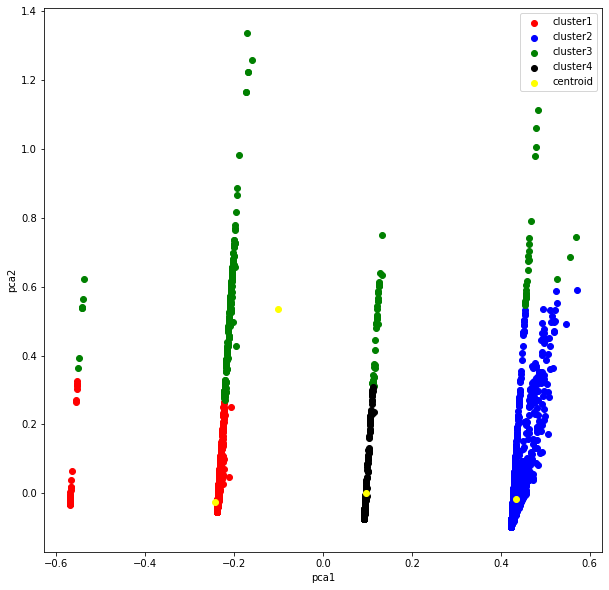

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(df_pca.iloc[y==0,0],df_pca.iloc[y==0,1],c="red",label="cluster1")
plt.scatter(df_pca.iloc[y==1,0],df_pca.iloc[y==1,1],c="blue",label="cluster2")
plt.scatter(df_pca.iloc[y==2,0],df_pca.iloc[y==2,1],c="green",label="cluster3")
plt.scatter(df_pca.iloc[y==3,0],df_pca.iloc[y==3,1],c="black",label="cluster4")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c="yellow",label="centroid")
plt.xlabel("pca1")
plt.ylabel("pca2")
plt.legend()
plt.show()

## Heircal clustering

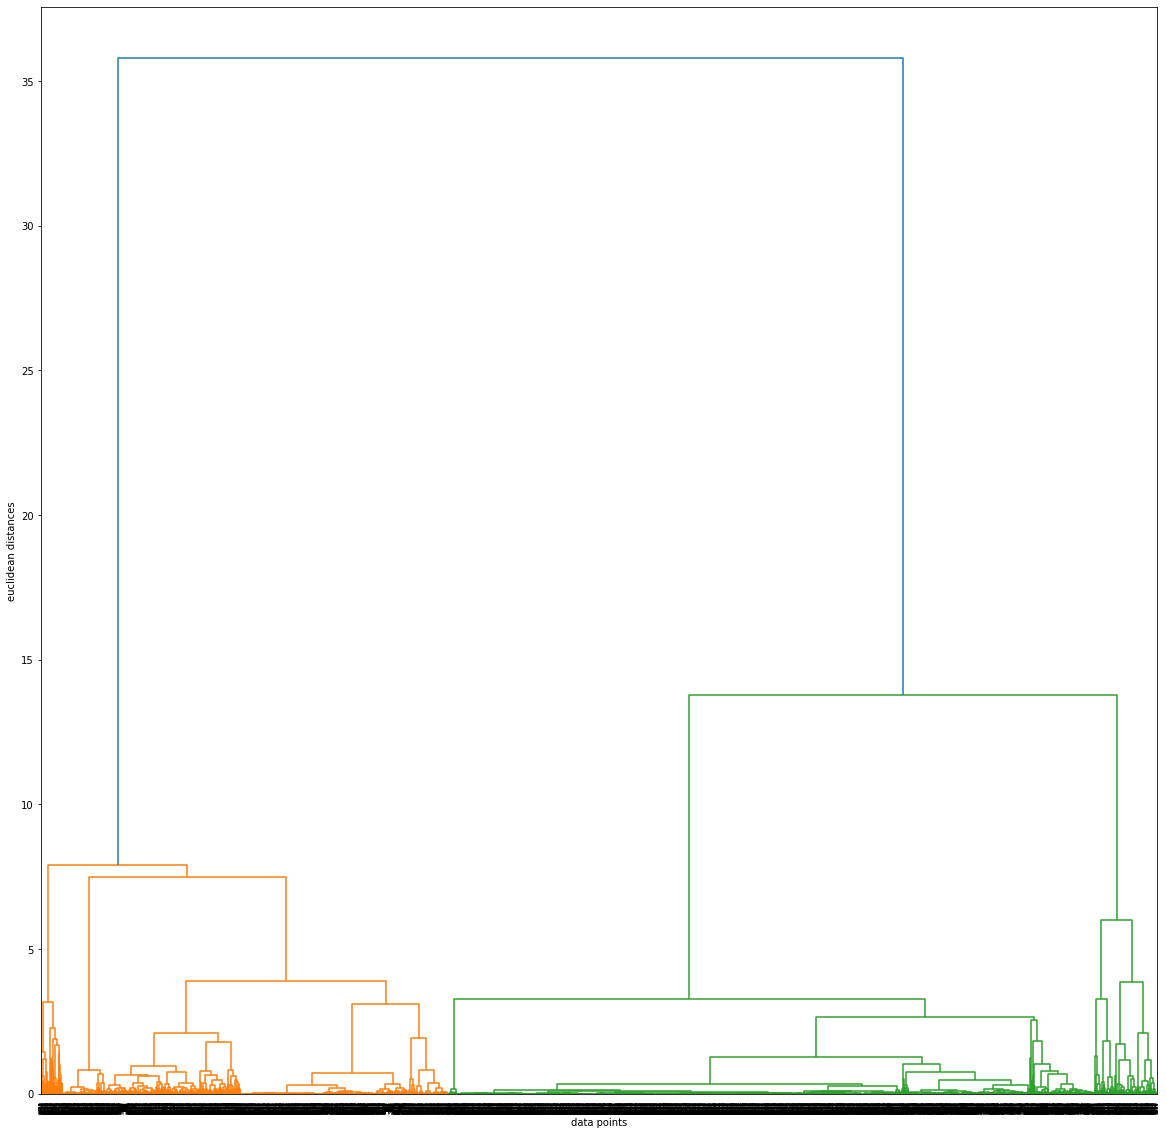

In [ ]:
# heirachical clustering
from scipy.cluster.hierarchy import linkage, dendrogram
"""Dendrogram is a tree diagram that records the sequences of merges or splits in a hierarchical clustering.
It is used to find the optimal number of clusters in the data."""
plt.figure(figsize=(20, 20))
merg = linkage(df_std, method = "ward") # ward method is used to minimize the variance within each cluster
dendrogram(merg, leaf_rotation = 90) # leaf_rotation is used to rotate the x-axis labels
plt.xlabel("data points")
plt.ylabel("euclidean distances")
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(df_std)

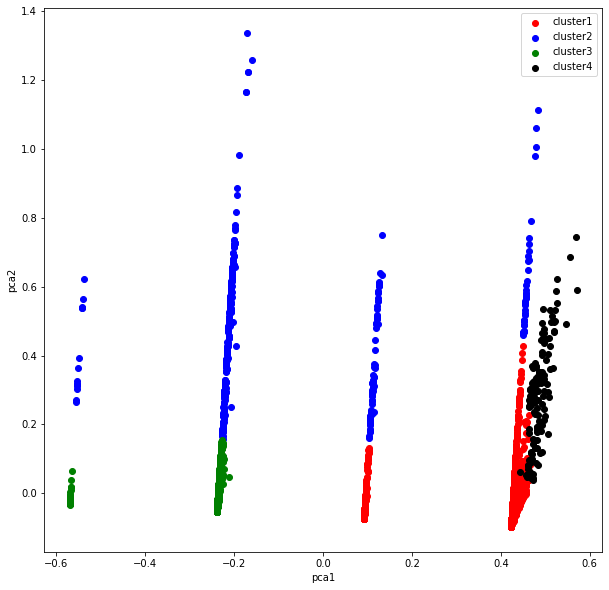

In [ ]:
#plotting
plt.figure(figsize=(10,10))
plt.scatter(df_pca.iloc[y_hc==0,0],df_pca.iloc[y_hc==0,1],c="red",label="cluster1")
plt.scatter(df_pca.iloc[y_hc==1,0],df_pca.iloc[y_hc==1,1],c="blue",label="cluster2")
plt.scatter(df_pca.iloc[y_hc==2,0],df_pca.iloc[y_hc==2,1],c="green",label="cluster3")
plt.scatter(df_pca.iloc[y_hc==3,0],df_pca.iloc[y_hc==3,1],c="black",label="cluster4")
plt.xlabel("pca1")
plt.ylabel("pca2")
plt.legend()
plt.show()

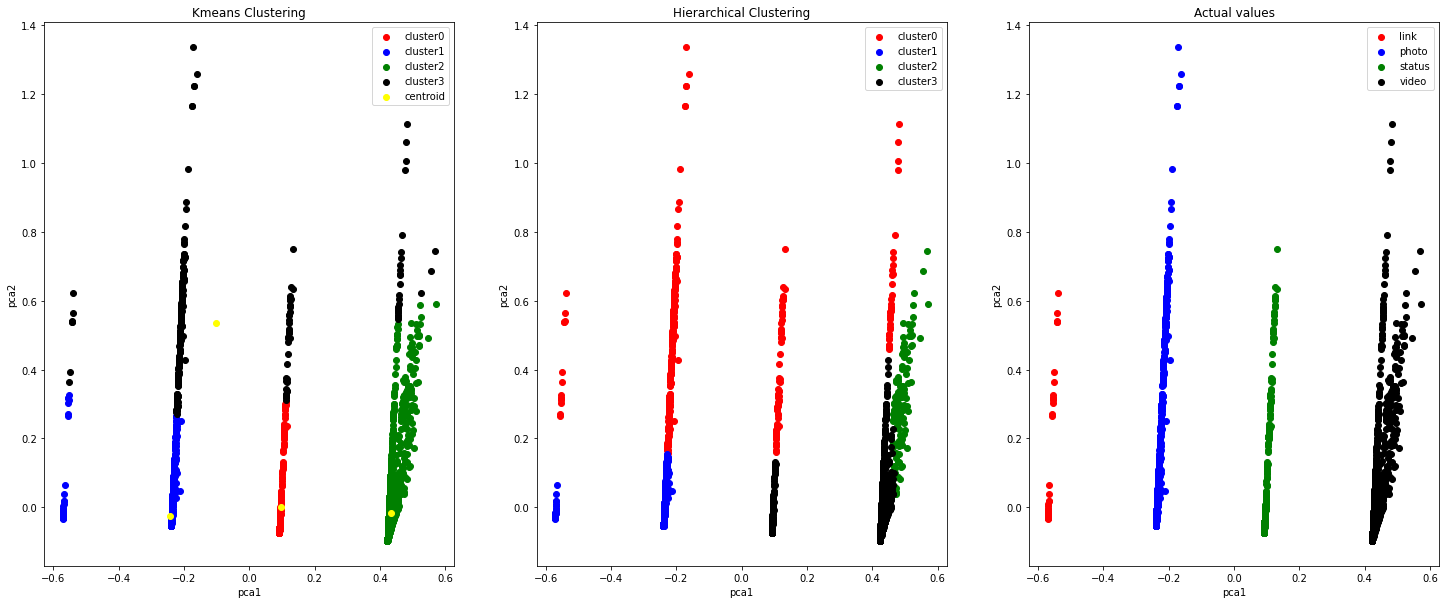

In [ ]:
# compare the results of kmeans and heirachical clustering and actual values
plt.figure(figsize=(25,10))
plt.subplot(1,3,1)
plt.scatter(df_pca.iloc[y==0,0],df_pca.iloc[y==0,1],c="red",label="cluster0")
plt.scatter(df_pca.iloc[y==1,0],df_pca.iloc[y==1,1],c="blue",label="cluster1")
plt.scatter(df_pca.iloc[y==2,0],df_pca.iloc[y==2,1],c="green",label="cluster2")
plt.scatter(df_pca.iloc[y==3,0],df_pca.iloc[y==3,1],c="black",label="cluster3")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c="yellow",label="centroid")
plt.xlabel("pca1")
plt.ylabel("pca2")
plt.legend()
plt.title("Kmeans Clustering")
plt.subplot(1,3,2)
plt.scatter(df_pca.iloc[y_hc==0,0],df_pca.iloc[y_hc==0,1],c="red",label="cluster0")
plt.scatter(df_pca.iloc[y_hc==1,0],df_pca.iloc[y_hc==1,1],c="blue",label="cluster1")
plt.scatter(df_pca.iloc[y_hc==2,0],df_pca.iloc[y_hc==2,1],c="green",label="cluster2")
plt.scatter(df_pca.iloc[y_hc==3,0],df_pca.iloc[y_hc==3,1],c="black",label="cluster3")
plt.xlabel("pca1")
plt.ylabel("pca2")
plt.legend()
plt.title("Hierarchical Clustering")
plt.subplot(1,3,3)
y_act = df_oh.status_type
y_act = np.array(y_act)
plt.scatter(df_pca.iloc[y_act==0,0],df_pca.iloc[y_act==0,1],c="red",label="link")
plt.scatter(df_pca.iloc[y_act==1,0],df_pca.iloc[y_act==1,1],c="blue",label="photo")
plt.scatter(df_pca.iloc[y_act==2,0],df_pca.iloc[y_act==2,1],c="green",label="status")
plt.scatter(df_pca.iloc[y_act==3,0],df_pca.iloc[y_act==3,1],c="black",label="video")
plt.xlabel("pca1")
plt.ylabel("pca2")
plt.legend()
plt.title("Actual values")
plt.show()

From the above graph we can infer that

| Model | Cluster 0 | Cluster 1 | Cluster 2 | Cluster 3
| --- | --- | --- | --- | --- |
| Kmeans | Status | Photo | Video | Link |

Heirachical clustering is not giving good results as compared to Kmeans clustering

In [ ]:
## group clusters with status_type
df_oh["cluster"] = y
df_oh.groupby("cluster").status_type.value_counts()